<a href="https://colab.research.google.com/github/AzizOzmen/Clarusway_Data_Science_Materials/blob/main/Statistics_Assignment_4_FinalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

**EXERCISE 1. Answer the following questions by looking at the distribution table or coding with Python.**

**PART 1: A salesperson has found that the probability of a sale on a single contact is approximately .3. If the salesperson contacts 10 prospects, what is the approximate probability of making at least one sale?**


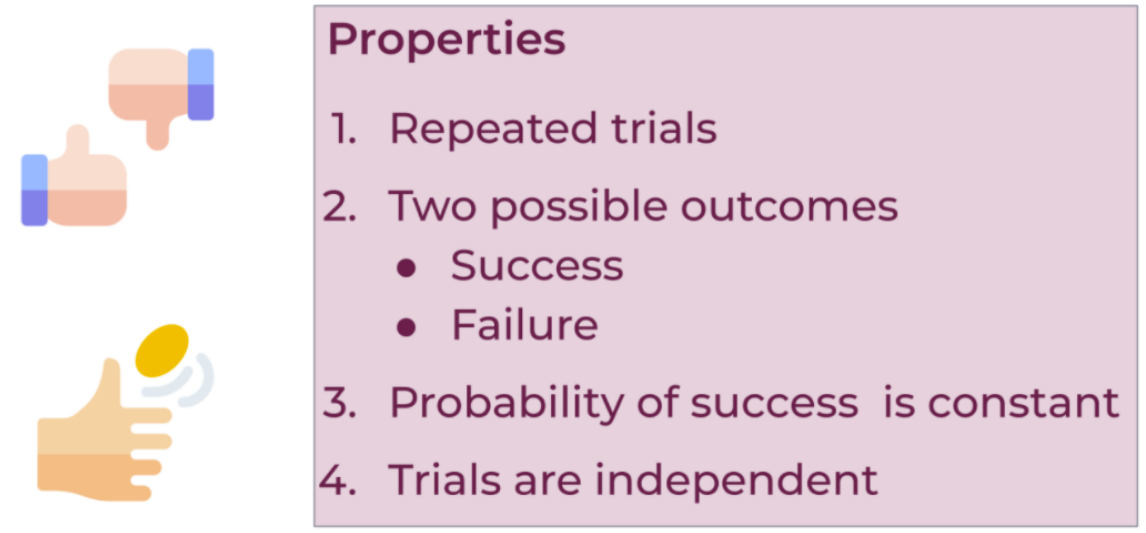

**Assumptions:**

**Condition 1:** For each individual sale, there are only **two possible outcomes**, sale or no sale. Since we were interested in **sale**, then that outcome can be considered the **success**, with a fixed probability of 0.3 (30%).

**Condition 2:** The number of sales was fixed at 10, so the experiment was performed a fixed number of times per sale(Probability is **constant**).

**Condition 3:** We assumed that each sale had no relationship (**independent**) between one another because each contact with prospects randomly produces an average of 3% sale.

**Solution PART 1 : If the salesperson contacts 10 prospects, what is the approximate probability of making at least one sale?**

The probability of a sale on a single contact, 
**p = 0.3**

The sample size, 
**n = 10**


The average rate is the product of the sample size and the probability:

*np* = 10 * (0.3) = **3**

In [ ]:
p = 0.3
n = 10
x = 1

**at least one sale?**

this is P(X≥1) = P(X=1)+P(X=2)+P(X=3)+P(X=4)+...+P(X=10)

or

P(X≥1) = 1 - P(X=0)

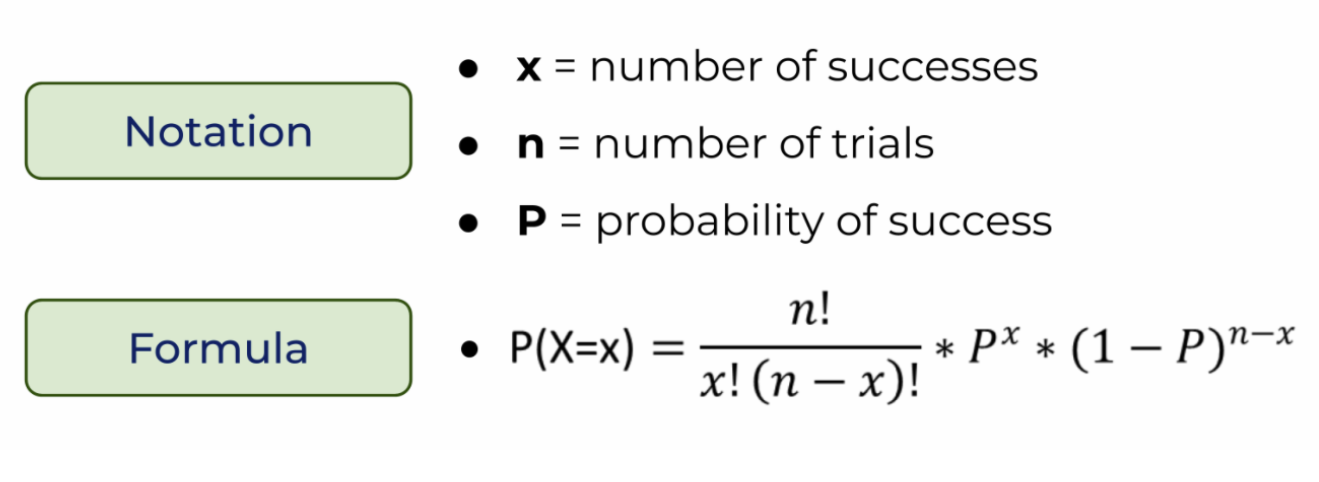

In [ ]:
import math
print('P(X=1) = ', (math.factorial(n)/(math.factorial(x)*math.factorial(n-x)))*p**x*(1-p)**(n-x))


P(X=1) =  0.12106082099999993


In [ ]:
import math
P_X_0 = math.factorial(n)/(math.factorial(0)*math.factorial(n-0))*p**x*(1-p)**(n-0)
print('P(X=0) = ', P_X_0)

P(X=0) =  0.008474257469999994


In [ ]:
import math
print('P(X>=1) = ', 1 - P_X_0)

P(X>=1) =  0.99152574253


In [ ]:
# With Scipy

n = 10
p = 0.3
x = 0

**cdf(x, n, p, loc=0)	Cumulative density function**

In [ ]:
stats.binom.cdf(x, n, p)

0.02824752489999998

In [ ]:
1 - stats.binom.cdf(x, n, p)

0.9717524751000001

In [ ]:
# create binom distribution and assign it to variable z_rv

z_rv = stats.binom(n, p)

In [ ]:
type(z_rv)

scipy.stats._distn_infrastructure.rv_frozen

In [ ]:
# x values

possible_values = np.arange(0, n + 1)
possible_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# probabilities corresponging to x values

probs = z_rv.pmf(possible_values)
probs

array([2.82475249e-02, 1.21060821e-01, 2.33474440e-01, 2.66827932e-01,
       2.00120949e-01, 1.02919345e-01, 3.67569090e-02, 9.00169200e-03,
       1.44670050e-03, 1.37781000e-04, 5.90490000e-06])

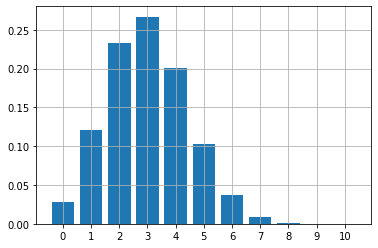

In [ ]:
#  distribution of binomial z_rv

fig, ax = plt.subplots()
ax.bar(possible_values, probs)
ax.set_xticks(possible_values)
ax.grid();

**Another long-run solution method**

In [ ]:
long_solution = stats.binom.pmf(1, n, p)+stats.binom.pmf(2, n, p)+stats.binom.pmf(3, n, p)+stats.binom.pmf(4, n, p)+stats.binom.pmf(5, n, p)\
+stats.binom.pmf(6, n, p)+stats.binom.pmf(7, n, p)+stats.binom.pmf(8, n, p)+stats.binom.pmf(9, n, p)+stats.binom.pmf(10, n, p)

In [ ]:
long_solution

0.9717524750999997

**Solution PART 2: Ten coins are tossed simultaneously. Find the probability of getting**

>>>(i) **at least** seven heads

>>>(ii) **exactly** seven heads

>>>(iii) **at most** seven heads

**Solution (i) at least seven heads**

In [ ]:
# Solution with Scipy

n = 10
p = 0.5
x1 = 6

In [ ]:
P_total = 0
for x in range(7, 11):
    P_total += math.factorial(n)/(math.factorial(x)*math.factorial(n-x))*p**x*(1-p)**(n-x)
print("P(X>=7) : ", P_total)

P(X>=7) :  0.171875


In [ ]:
# Solution with scipy

In [ ]:
stats.binom.cdf(x1, n, p)

0.828125

In [ ]:
1 - stats.binom.cdf(x1, n, p)

0.171875

**Solution (ii) exactly seven heads**

In [ ]:
# With Scipy

n = 10
p = 0.5
x2 = 7

In [ ]:
P_X_7 = math.factorial(n) / (math.factorial(x2)*math.factorial(n-x2))*p**x2*(1-p)**(n-x2)
P_X_7

# X exactly 7

0.1171875

In [ ]:
# PMF (Probability Mass Function) gives the probability value of the exact score 

stats.binom.pmf(x2, n, p)

0.11718750000000014

**Solution (iii) at most seven heads**

this is P(X≤7) = 1−P(X>8) = 1 - ( P(8) + P(9) + P(10) )

**OR**

P(X≤7) = P(1)+P(2)+P(3)+P(4)+P(5)+P(6)+P(7)

In [ ]:
P_total2 = 0
for x in range(0, 8):
    P_total2 += math.factorial(n)/(math.factorial(x)*math.factorial(n-x))*p**x*(1-p)**(n-x)
print("P(X<=7) : ", P_total2)

P(X<=7) :  0.9453125


In [ ]:
# With Scipy

n = 10
p = 0.5
x3 = 7

In [ ]:
# CDF (cumulative distribution function) takes a score and gives the cumulative probability value from begining to that score (including) as result.

stats.binom.cdf(x3, n, p)

0.9453125

**EXERCISE 2. The cycle time for trucks hauling concrete to a highway construction site is uniformly distributed over the interval 50 to 70 minutes. What is the probability that the cycle time exceeds 65 minutes  if it is known that the cycle time exceeds 55 minutes?**

**Solution**

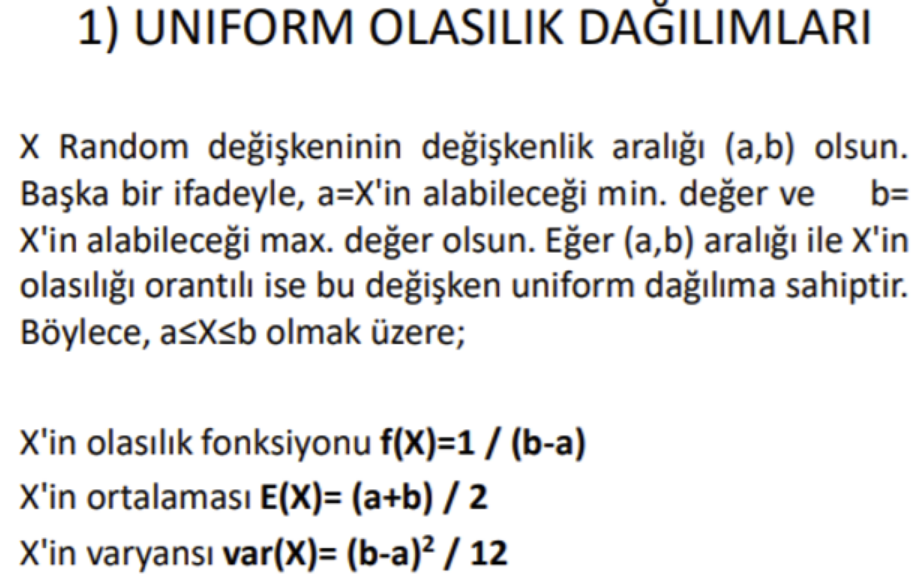![image.png](attachment:image.png)

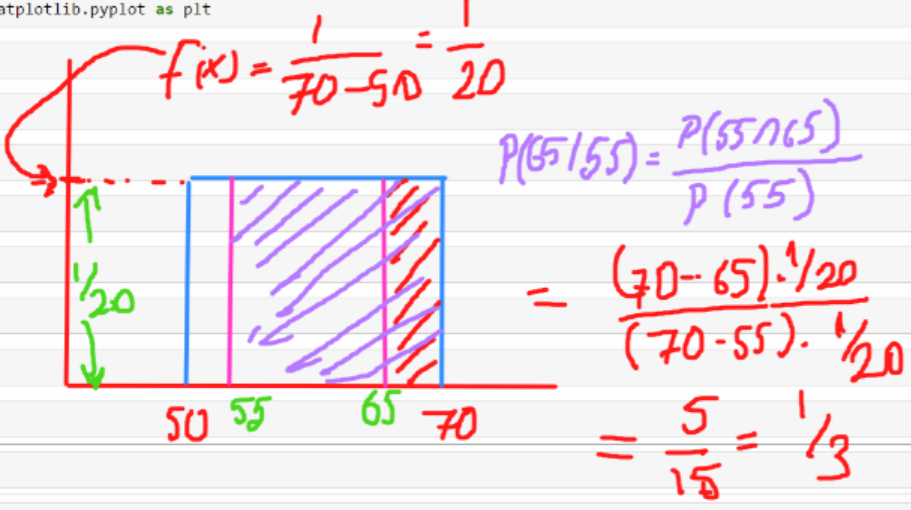

Let Y = cycle time. Y has a uniform on the interval (50, 70)

a=50 and b=70


P(Y>65 | Y>55)  = P(y>65 ∩ y>55) / P(Y>55) 
                =     P(Y>65)    / P(Y>55)

= P(70-65)/20 / P(70-55)/20

= P(5/20) / P(15/20)

= 0.25 / 0.75 

= 1 / 3 =  0.33333  (33.3333 %)

In [ ]:
p = 1 / (70-50)

mu = (70+50) / 2

var = (70-50)**2 / 12

sigma = np.sqrt(var)

In [ ]:
p

0.05

In [ ]:
mu

60.0

In [ ]:
var

33.333333333333336

In [ ]:
sigma

5.773502691896258

In [ ]:
# Solution with Scipy


loc = a = 50  (insert lower value as mü(μ) if it is a uniform distribution in scipy)

AND

scale = b-a = 70-50 = 20  (insert the difference of b and a values as sigma(σ) if it is a uniform distribution in scipy)

In [ ]:
aziz = stats.uniform.cdf(70, loc=50, scale=20) -  stats.uniform.cdf(65, loc=50, scale=20)
aziz 

0.25

In [ ]:
huseyin = stats.uniform.cdf(70, loc=50, scale=20) - stats.uniform.cdf(55, loc=50, scale=20)
huseyin

0.75

In [ ]:
aziz / huseyin  # P(Y>65) / P(Y>55)

# the probability that the cycle time exceeds 65 minutes given exceeds 55 minutes is 0.3333333

0.3333333333333333

In [ ]:
# solution with scipy

**EXERCISE 3. The width of bolts of fabric is normally distributed with mean 950 mm (millimeters) and standard deviation 10 mm.**

>>>**(i) What is the probability that a randomly chosen bolt has a width of between 947 and 958mm?**

>>>**(ii) What is the appropriate value for C such that a randomly chosen bolt has a width less than C with probability .8531?**

**Solution (i) :** **What is the probability that a randomly chosen bolt has a width of between 947 and 958mm?**

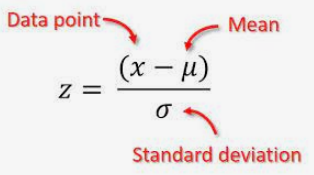

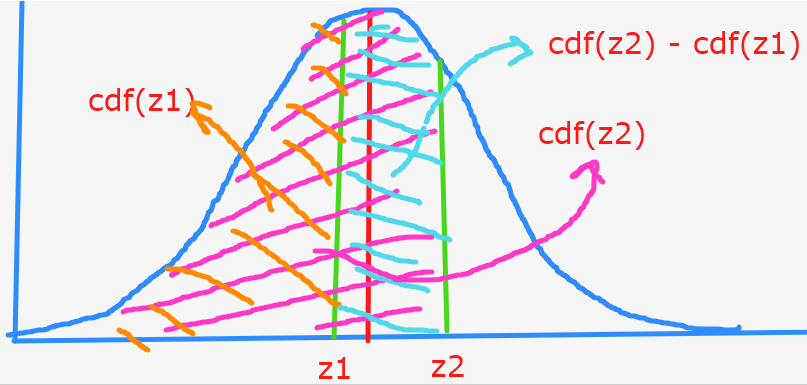

Let X denote the width of a randomly selected bolt. Then, by assumption, X ∼ N(µ=950, σ = 10)

**Solution:**

z = x ̅  - μ / σ

z1 = ( 947 - 950 ) / 10  = - 0.3  # used z-score table
z2 = ( 958 - 950 ) / 10  =   0.8  # used z-score table

-0.3 < z < 0.8


P(z1< z < z2) = P(-0.3 ≤ z ≤ 0.8)


>>>= (Φ(0.8) - Φ(−0.3)) 

>>>= 0.7881 - 0.38209

>>>= **0.4060**

In [ ]:
mean = 950

std = 10

In [ ]:
# With Scipy

a = stats.norm.cdf(947, mean, std)

In [ ]:
b =stats.norm.cdf(958, mean, std)

In [ ]:
b-a

0.406056023605556

In [ ]:
z947 = stats.norm.ppf(a)
z947

-0.3

In [ ]:
z958 = stats.norm.ppf(b)
z958

0.8000000000000002

In [ ]:
c =stats.norm.cdf(950, 950, 10)

In [ ]:
z950 = stats.norm.ppf(c)
z950

0.0

**Solution (ii) : What is the appropriate value for C such that a randomly chosen bolt has a width less than C with probability .8531?**

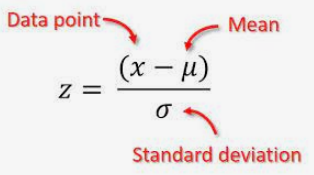


In [ ]:
# With Scipy

In [ ]:
z1 = stats.norm.ppf(0.8531)
z1

1.0498219096264123

In [ ]:
C = z1 * 10 + 950
C

960.4982190962642

In [ ]:
dist = stats.norm(mean, std)

In [ ]:
dist.ppf(0.8532)

960.5025693315208

**EXERCISE 4. Suppose scores on exams in statistics are normally distributed with an unknown population mean and a population standard deviation of 3 points. A random sample of 36 scores is taken and gives a sample mean (sample mean score) of 68. Find a confidence interval estimate for the population mean exam score (the mean score on all exams). Find a 90% confidence interval for the true (population) mean of statistics exam scores.**

To find the confidence interval, we need the sample mean the error bound for a population mean (EBM) 
(EBM = MOE Margin of Error)

x¯ (sample mean) = 68
 
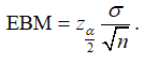
    
σ = 3;   n = 36
 
The confidence level is 90% (CL = 0.90)

CL = 0.90
 
so

α = 1–CL = 1–0.90 = 0.10
 
α/2 = 0.05zα/2 = z0.05
 
The area to the right of z0.05 is 0.05 and the area to the left of z0.05 is 1−0.05 = 0.95 .

zα/2 = z0.05 = **1.645**  (we find this score from z-table by looking at 0.95)

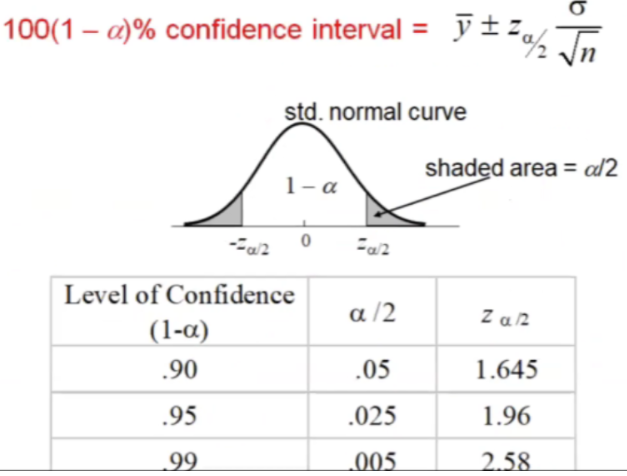

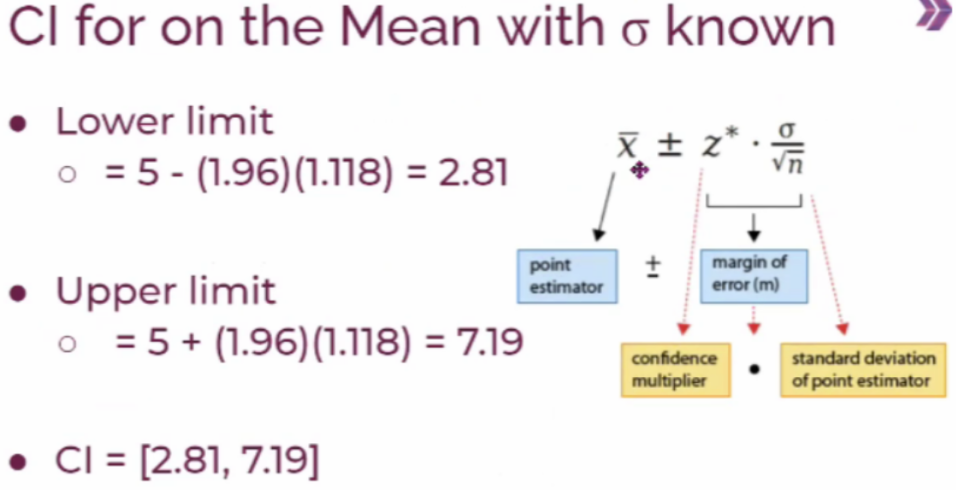

In [ ]:
# With Scipy

ci = 0.90
n1 = 36
mean = 68
std = 3
sem = 3 / np.sqrt(n1)

In [ ]:
stats.norm.interval(alpha=ci, loc=mean, scale=sem)

(67.17757318652427, 68.82242681347573)

**Interpretation:** We estimate with 90% confidence that the true population mean of exam scores for all statistics students is between 67.18 and 68.82.

Explanation of 90% Confidence Level: Ninety percent of all confidence intervals constructed in this way contain the true mean statistics for exam scores. For example, if we constructed 100 of these confidence intervals, we would expect 90 of them to contain the true population mean exam score.

**EXERCISE 5**

**What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker7 yielded 98.25 degrees and standard deviation 0.73 degrees. Give a 99% confidence interval for the average body temperature of healthy people.**

>>>**(i). Give a 99% confidence interval for the average body temperature of healthy people.**

>>>**(ii). Does the confidence interval obtained in part (a) contain the value 98.6 degrees, the accepted average temperature cited by physicians and others? What conclusions can you draw? (Wackerly, Ex.8.60)**

**Solution (i)**

98.25 - 2.58 * (0.73 / √130) < x¯ < 98.25 - 2.58 * (0.73 / √130)

98.25 - 0.1651851073562859 < x¯ < 98.25 + 0.1651851073562859

98.08481489264371 < x¯ < 98.41518510735629

The 90% confidence interval is (**98.085, 98.415**).

In [ ]:
# With Scipy

ci1 = 0.99
n2 = 130
mean1 = 98.25
std1 = 0.73
sem1 = 0.73 / np.sqrt(n2)

In [ ]:
stats.norm.interval(alpha=ci1, loc=mean1, scale=sem1)

(98.08508192246582, 98.41491807753418)

**Solution (ii)**